In [ ]:
pip install imutils

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from imutils import paths
import os
import warnings
warnings.simplefilter("ignore")

### Read the images and convert it to arrays

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DIRECTORY = "/content/drive/MyDrive/NNDL Project/dataset"
CATEGORIES = ["with_mask","without_mask"]

In [ ]:
data = []
labels = []

In [ ]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category)

In [ ]:
np.unique(labels)

array(['with_mask', 'without_mask'], dtype='<U12')

###  One Hot Encoding on labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(labels)
label

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
label = to_categorical(label)  #vector can be converted into a numpy array
label

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
data = np.array(data, dtype="float32")
labels = np.array(label)

In [ ]:
data

array([[[[-0.6627451 , -0.7411765 , -0.67058825],
         [-0.654902  , -0.73333335, -0.6627451 ],
         [-0.67058825, -0.7490196 , -0.6784314 ],
         ...,
         [ 0.8745098 ,  0.84313726,  0.8352941 ],
         [ 0.8745098 ,  0.84313726,  0.8352941 ],
         [ 0.8745098 ,  0.84313726,  0.8352941 ]],

        [[-0.64705884, -0.7254902 , -0.654902  ],
         [-0.6392157 , -0.7176471 , -0.64705884],
         [-0.64705884, -0.7254902 , -0.654902  ],
         ...,
         [ 0.8745098 ,  0.84313726,  0.8352941 ],
         [ 0.8745098 ,  0.84313726,  0.8352941 ],
         [ 0.8745098 ,  0.84313726,  0.8352941 ]],

        [[-0.6392157 , -0.7176471 , -0.64705884],
         [-0.64705884, -0.7254902 , -0.654902  ],
         [-0.64705884, -0.7254902 , -0.654902  ],
         ...,
         [ 0.8745098 ,  0.84313726,  0.8352941 ],
         [ 0.8745098 ,  0.84313726,  0.8352941 ],
         [ 0.8745098 ,  0.84313726,  0.8352941 ]],

        ...,

        [[ 0.427451  ,  0.05098045, -0

In [ ]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2)

### Training the Model

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

#### Construct the Training Image Data Generator for Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range = 20,
                     zoom_range = 0.15,
                     width_shift_range = 0.2,
                     shear_range = 0.15,
                     horizontal_flip = True,
                     fill_mode = "nearest")

In [ ]:
x_train = x_train/255.0

In [ ]:
x_test = x_test/255.0

### CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(7,7)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

opt = Adam(lr = INIT_LR, decay = INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
face_model = model.fit(
	aug.flow(x_train, y_train, batch_size=BS),
	steps_per_epoch=len(x_train) // BS,
	validation_data=(x_test, y_test),
	validation_steps=len(x_test) // BS,
	epochs=EPOCHS)

Epoch 1/20
96/96 [==============================] - 57s 485ms/step - loss: 0.6621 - accuracy: 0.6571 - val_loss: 0.5655 - val_accuracy: 0.8049
Epoch 2/20
96/96 [==============================] - 43s 443ms/step - loss: 0.4376 - accuracy: 0.8258 - val_loss: 0.3049 - val_accuracy: 0.9025
Epoch 3/20
96/96 [==============================] - 43s 446ms/step - loss: 0.3205 - accuracy: 0.8800 - val_loss: 0.2444 - val_accuracy: 0.9181
Epoch 4/20
96/96 [==============================] - 43s 449ms/step - loss: 0.2882 - accuracy: 0.8935 - val_loss: 0.2330 - val_accuracy: 0.9194
Epoch 5/20
96/96 [==============================] - 43s 448ms/step - loss: 0.2929 - accuracy: 0.8882 - val_loss: 0.2190 - val_accuracy: 0.9285
Epoch 6/20
96/96 [==============================] - 43s 448ms/step - loss: 0.2780 - accuracy: 0.8938 - val_loss: 0.2065 - val_accuracy: 0.9272
Epoch 7/20
96/96 [==============================] - 43s 446ms/step - loss: 0.2570 - accuracy: 0.9080 - val_loss: 0.1998 - val_accuracy: 0.9285

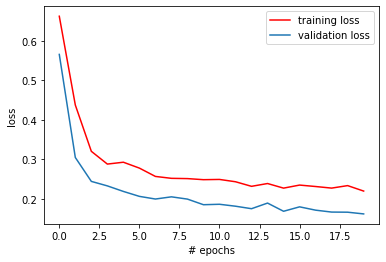

In [ ]:
import matplotlib.pyplot as plt

plt.plot(face_model.history['loss'],'r',label='training loss')
plt.plot(face_model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

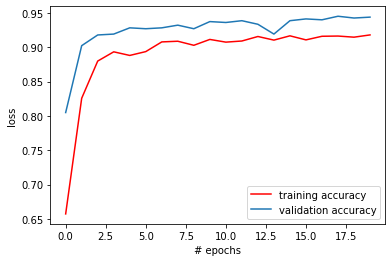

In [ ]:
plt.plot(face_model.history['accuracy'],'r',label='training accuracy')
plt.plot(face_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(x_test, batch_size=BS)
pred

array([[9.9996805e-01, 3.1906198e-05],
       [5.4045695e-01, 4.5954305e-01],
       [1.5448750e-02, 9.8455125e-01],
       ...,
       [9.8000950e-01, 1.9990513e-02],
       [6.9202036e-01, 3.0797964e-01],
       [7.7503815e-02, 9.2249614e-01]], dtype=float32)

In [ ]:
pred1 = np.argmax(pred,axis = 1)
pred1

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       396
           1       0.93      0.95      0.94       373

    accuracy                           0.94       769
   macro avg       0.94      0.94      0.94       769
weighted avg       0.94      0.94      0.94       769



In [ ]:
model.save("/content/drive/MyDrive/NNDL Project/mask_detector.h5")


In [ ]:
model.evaluate(x_test,y_test)

25/25 [==============================] - 2s 91ms/step - loss: 0.1622 - accuracy: 0.9441


[0.1621571183204651, 0.9440832138061523]